In [2]:
!pip install pandas matplotlib seaborn numpy

Defaulting to user installation because normal site-packages is not writeable


In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

In [5]:
input_data = "sleep_deprivation_dataset_detailed.csv"
df = pd.read_csv(input_data)


In [8]:
df.head()

,Participant_ID,Sleep_Hours,Sleep_Quality_Score,Daytime_Sleepiness,Stroop_Task_Reaction_Time,N_Back_Accuracy,Emotion_Regulation_Score,PVT_Reaction_Time,Age,Gender,BMI,Caffeine_Intake,Physical_Activity_Level,Stress_Level
0,P1,5.25,15,12,1.60,64.20,12,365.85,35,Female,30.53,2,1,33
1,P2,8.70,12,14,2.54,65.27,21,288.95,20,Male,27.28,3,8,37
2,P3,7.39,17,10,3.40,74.28,35,325.93,18,Male,30.00,1,2,32
3,P4,6.59,14,3,3.54,72.42,25,276.86,18,Male,34.47,5,0,23
4,P5,3.94,20,12,3.09,99.72,60,383.45,36,Male,29.70,3,4,14


In [11]:
df.tail()

,Participant_ID,Sleep_Hours,Sleep_Quality_Score,Daytime_Sleepiness,Stroop_Task_Reaction_Time,N_Back_Accuracy,Emotion_Regulation_Score,PVT_Reaction_Time,Age,Gender,BMI,Caffeine_Intake,Physical_Activity_Level,Stress_Level
55,P56,8.53,16,16,3.51,64.76,41,391.48,34,Male,23.01,2,5,8
56,P57,3.53,19,16,3.24,66.13,36,355.01,24,Female,34.93,2,1,25
57,P58,4.18,3,1,2.62,92.43,29,397.13,41,Male,29.85,0,1,21
58,P59,3.27,4,1,4.32,56.83,33,330.70,40,Female,24.53,4,1,29
59,P60,4.95,6,21,4.42,85.45,21,419.01,22,Male,30.53,0,10,16


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Participant_ID             60 non-null     object 
 1   Sleep_Hours                60 non-null     float64
 2   Sleep_Quality_Score        60 non-null     int64  
 3   Daytime_Sleepiness         60 non-null     int64  
 4   Stroop_Task_Reaction_Time  60 non-null     float64
 5   N_Back_Accuracy            60 non-null     float64
 6   Emotion_Regulation_Score   60 non-null     int64  
 7   PVT_Reaction_Time          60 non-null     float64
 8   Age                        60 non-null     int64  
 9   Gender                     60 non-null     object 
 10  BMI                        60 non-null     float64
 11  Caffeine_Intake            60 non-null     int64  
 12  Physical_Activity_Level    60 non-null     int64  
 13  Stress_Level               60 non-null     int64  
d

In [16]:
df.describe()

,Sleep_Hours,Sleep_Quality_Score,Daytime_Sleepiness,Stroop_Task_Reaction_Time,N_Back_Accuracy,Emotion_Regulation_Score,PVT_Reaction_Time,Age,BMI,Caffeine_Intake,Physical_Activity_Level,Stress_Level
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.0000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,5.805500,8.316667,12.000000,3.245000,75.005833,38.1500,332.539000,29.516667,27.329333,2.383333,4.116667,17.866667
std,1.832357,5.637320,7.577845,0.827368,13.671457,17.1334,87.800288,8.168753,4.541382,1.688362,3.108717,11.015346
min,3.120000,0.000000,0.000000,1.600000,50.900000,10.0000,201.560000,18.000000,18.740000,0.000000,0.000000,0.000000
25%,4.107500,4.000000,6.000000,2.595000,64.620000,25.0000,257.535000,21.750000,23.580000,1.000000,1.000000,8.750000
50%,5.690000,8.000000,11.500000,3.260000,74.270000,37.0000,327.210000,28.500000,27.365000,2.500000,4.000000,17.500000
75%,7.285000,13.000000,19.000000,3.965000,85.600000,54.2500,402.845000,36.000000,30.747500,4.000000,6.000000,26.250000
max,8.820000,20.000000,24.000000,4.490000,99.730000,67.0000,494.550000,43.000000,34.930000,5.000000,10.000000,40.000000


In [18]:
df.columns

Index(['Participant_ID', 'Sleep_Hours', 'Sleep_Quality_Score',
       'Daytime_Sleepiness', 'Stroop_Task_Reaction_Time', 'N_Back_Accuracy',
       'Emotion_Regulation_Score', 'PVT_Reaction_Time', 'Age', 'Gender', 'BMI',
       'Caffeine_Intake', 'Physical_Activity_Level', 'Stress_Level'],
      dtype='object')

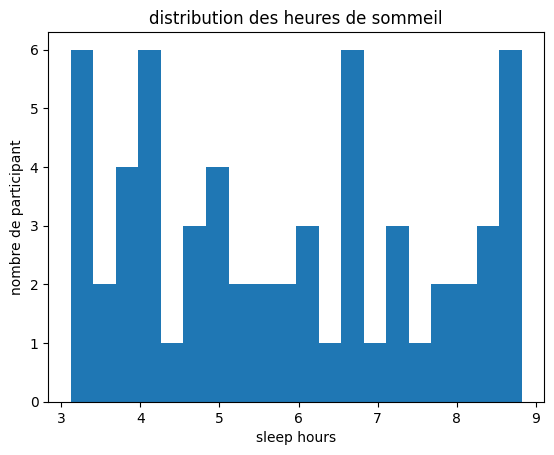

In [47]:

plt.hist(x=df["Sleep_Hours"], bins=20)
plt.title("distribution des heures de sommeil")
plt.xlabel("sleep hours")
plt.ylabel('nombre de participant')
plt.show()

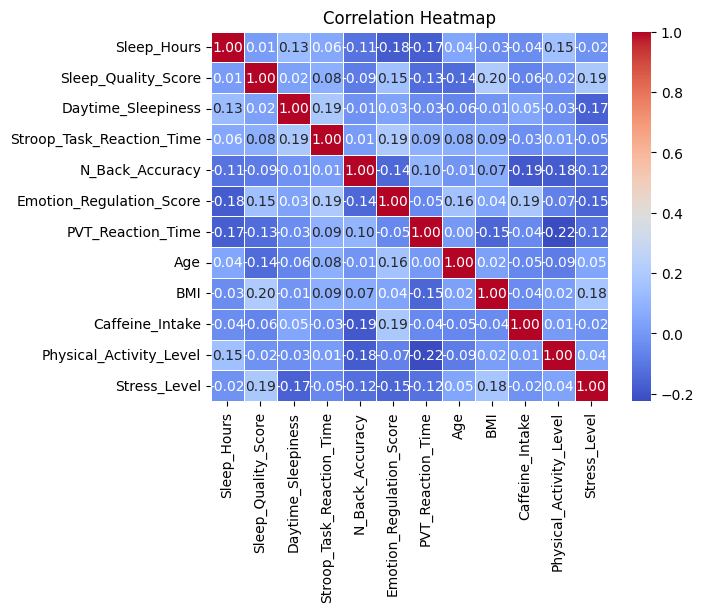

In [10]:
corr_matrix= df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

Text(0, 0.5, 'tache de memoire')

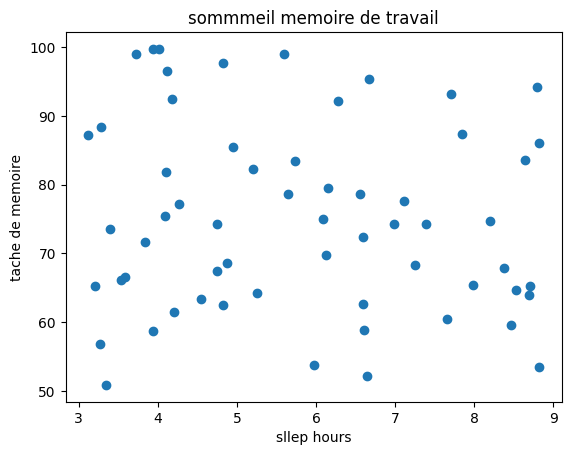

In [11]:
plt.scatter(x=df['Sleep_Hours'],y=df['N_Back_Accuracy'])
plt.title('sommmeil memoire de travail')
plt.xlabel('sllep hours')
plt.ylabel('tache de memoire')

Text(0.5, 1.0, 'effet de qualité du sommeil sur somnolence')

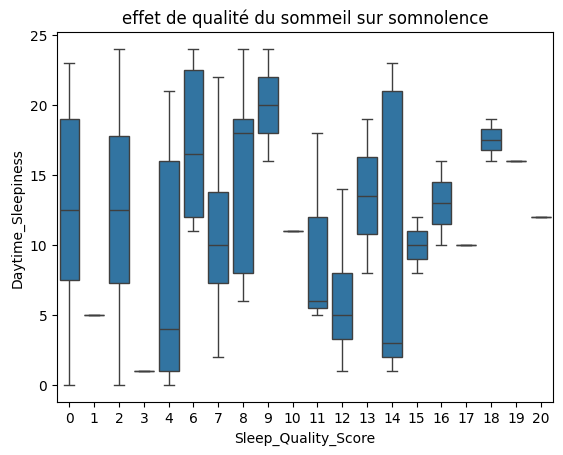

In [17]:
sns.boxplot(x=df['Sleep_Quality_Score'],y=df['Daytime_Sleepiness'] ,)
plt.title('effet de qualité du sommeil sur somnolence')

Text(0.5, 1.0, 'Corrélations : Sommeil, Stress et Régulation émotionnelle')

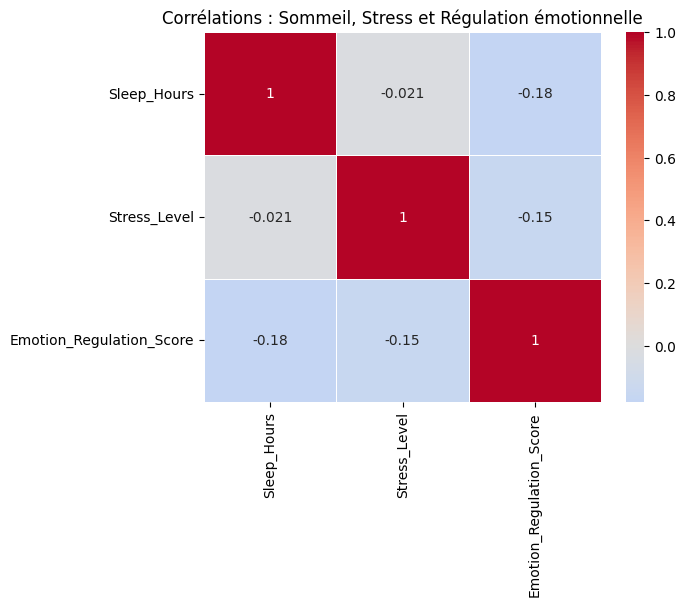

In [20]:
cols = ["Sleep_Hours", "Stress_Level", "Emotion_Regulation_Score"]
corr = df[cols].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0, linewidths=0.5)
plt.title("Corrélations : Sommeil, Stress et Régulation émotionnelle")


In [34]:
df["Sleep_Quality_Binary"] = df["Sleep_Quality_Score"].apply(lambda x: 1 if x >= 3 else 0)

features = ["Sleep_Hours", "Daytime_Sleepiness", "Stress_Level", "Caffeine_Intake", "Physical_Activity_Level", "BMI", "Age", "Gender"]

X = df[features]
y = df["Sleep_Quality_Binary"]

X["Gender"] = LabelEncoder().fit_transform(X["Gender"])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)




C:\Users\alime\AppData\Local\Temp\ipykernel_26708\2412849320.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Gender"] = LabelEncoder().fit_transform(X["Gender"])


In [35]:
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)
y_prob_log = log_reg.predict_proba(X_test)[:,1]

In [36]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:,1]

In [37]:
print("===== Logistic Regression =====")
print(confusion_matrix(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

print("\n===== Random Forest =====")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

===== Logistic Regression =====
[[ 0  1]
 [ 0 11]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.92      1.00      0.96        11

    accuracy                           0.92        12
   macro avg       0.46      0.50      0.48        12
weighted avg       0.84      0.92      0.88        12


===== Random Forest =====
[[ 0  1]
 [ 0 11]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.92      1.00      0.96        11

    accuracy                           0.92        12
   macro avg       0.46      0.50      0.48        12
weighted avg       0.84      0.92      0.88        12



C:\Users\alime\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\alime\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\alime\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\metrics\_clas

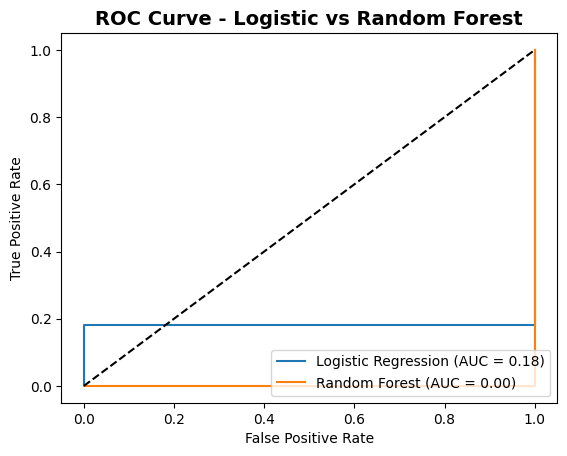

In [ ]:
fpr_log, tpr_log, _ = roc_curve(y_test, y_prob_log)
roc_auc_log = auc(fpr_log, tpr_log)

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.plot(fpr_log, tpr_log, label=f"Logistic Regression (AUC = {roc_auc_log:.2f})")
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {roc_auc_rf:.2f})")
plt.plot([0,1], [0,1], "k--") 
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic vs Random Forest", fontsize=14, weight="bold")
plt.legend(loc="lower right")


C:\Users\alime\AppData\Local\Temp\ipykernel_26708\1000554557.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances.sort_values(ascending=False),


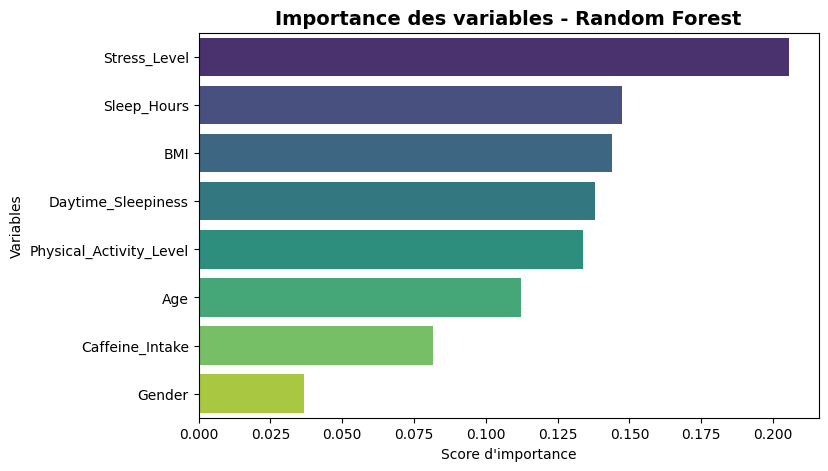

In [39]:
importances = pd.Series(rf.feature_importances_, index=features)

plt.figure(figsize=(8,5))
sns.barplot(x=importances.sort_values(ascending=False), 
            y=importances.sort_values(ascending=False).index, palette="viridis")
plt.title("Importance des variables - Random Forest", fontsize=14, weight="bold")
plt.xlabel("Score d'importance")
plt.ylabel("Variables")
plt.show()